In [1]:
from google.colab import files


uploaded = files.upload()

Saving ecommerce retail.xlsx to ecommerce retail.xlsx


In [4]:
import pandas as pd
import io

df = pd.read_excel(io.BytesIO(uploaded['ecommerce retail.xlsx']))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
Segmentation = pd.read_excel(io.BytesIO(uploaded['ecommerce retail.xlsx']), sheet_name = 'Segmentation')

In [5]:
#Thông tin các cột trong bảng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#Tóm tắt thống kê của các cột trong bảng
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
#Loại bỏ các giá trị NaN trong cột CustomerID
df = df.dropna(subset=['CustomerID'])

#Chuyển đổi data type của CustomerID thành số nguyên
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-7-677fbb0f30ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [8]:
#Lọc data
df1 = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['Country'] == 'United Kingdom')]

# Chuyển đổi cột InvoiceNo sang kiểu chuỗi
df1['InvoiceNo'] = df1['InvoiceNo'].astype(str)

# Lọc các hàng mà InvoiceNo không bắt đầu bằng 'C'
df2 = df1[~df1['InvoiceNo'].str.startswith('C')]

#Tính total price của từng transaction
df2['Total Price'] = df2['UnitPrice'] * df2['Quantity']

df2

<ipython-input-8-2379cc1cab0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceNo'] = df1['InvoiceNo'].astype(str)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.80


In [9]:
#Tạo bảng mới group by từng CustomerID
grouped_df2 = df2.groupby('CustomerID').agg(
                                            RecentInvoiceDate=('InvoiceDate', 'max'),
                                            Frequency = ('CustomerID', 'count'),
                                            MonetaryValue = ('Total Price', 'sum')
                                            )

#Tính số ngày từ lần mua gần nhất theo CustomerID
grouped_df2['Recency'] = (df2['InvoiceDate'].max() - grouped_df2['RecentInvoiceDate']).dt.days

grouped_df2

,RecentInvoiceDate,Frequency,MonetaryValue,Recency
CustomerID,,,,
12346,2011-01-18 10:01:00,1,77183.60,325
12747,2011-12-07 14:34:00,103,4196.01,1
12748,2011-12-09 12:20:00,4595,33719.73,0
12749,2011-12-06 09:56:00,199,4090.88,3
12820,2011-12-06 15:12:00,59,942.34,2
...,...,...,...,...
18280,2011-03-07 09:52:00,10,180.60,277
18281,2011-06-12 10:53:00,7,80.82,180
18282,2011-12-02 11:43:00,12,178.05,7


In [21]:
#Scoring
grouped_df2['recency_qcut'] = pd.qcut(grouped_df2['Recency'], q=5, labels=False)
grouped_df2['recency_rate'] = grouped_df2['recency_qcut'] + 1

grouped_df2['frequency_qcut'] = pd.qcut(grouped_df2['Frequency'], q=5, labels=False)
grouped_df2['frequency_rate'] = grouped_df2['frequency_qcut'] + 1

grouped_df2['monetary_qcut'] = pd.qcut(grouped_df2['MonetaryValue'], q=5, labels=False)
grouped_df2['monetary_rate'] = grouped_df2['monetary_qcut'] + 1

#Ghép 3 chỉ số đã scoring lại
grouped_df2['RFM_score'] = grouped_df2['recency_rate'].astype(str) + grouped_df2['frequency_rate'].astype(str) + grouped_df2['monetary_rate'].astype(str)

grouped_df2

,RecentInvoiceDate,Frequency,MonetaryValue,Recency,recency_qcut,recency_rate,frequency_qcut,frequency_rate,monetary_qcut,monetary_rate,RFM_score
CustomerID,,,,,,,,,,,
12346,2011-01-18 10:01:00,1,77183.60,325,4,5,0,1,4,5,515
12747,2011-12-07 14:34:00,103,4196.01,1,0,1,3,4,4,5,145
12748,2011-12-09 12:20:00,4595,33719.73,0,0,1,4,5,4,5,155
12749,2011-12-06 09:56:00,199,4090.88,3,0,1,4,5,4,5,155
12820,2011-12-06 15:12:00,59,942.34,2,0,1,3,4,3,4,144
...,...,...,...,...,...,...,...,...,...,...,...
18280,2011-03-07 09:52:00,10,180.60,277,4,5,0,1,0,1,511
18281,2011-06-12 10:53:00,7,80.82,180,4,5,0,1,0,1,511
18282,2011-12-02 11:43:00,12,178.05,7,0,1,0,1,0,1,111


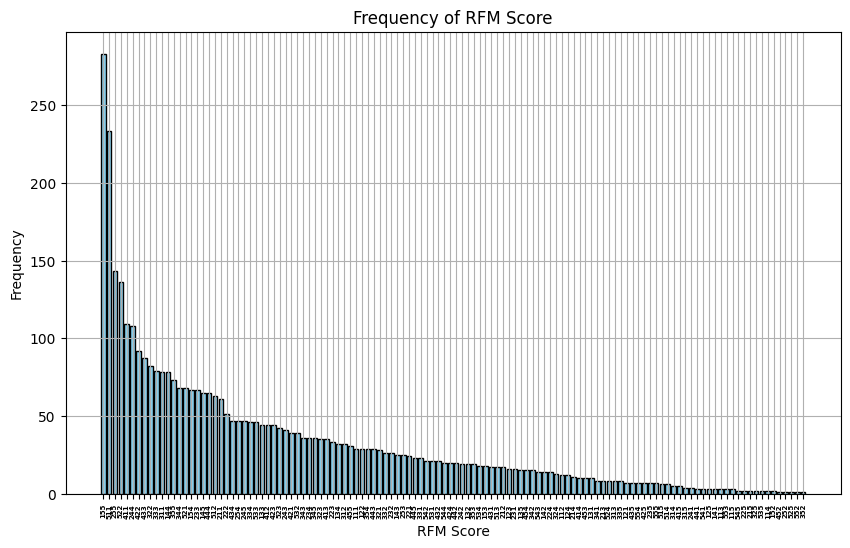

In [22]:
import matplotlib.pyplot as plt

# Đếm số lần xuất hiện của mỗi giá trị trong cột 'RFM_score'
rfm_counts = grouped_df2['RFM_score'].value_counts()

# Biểu diễn số lượng các giá trị của cột 'RFM_score' dưới dạng biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(rfm_counts.index, rfm_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.title('Frequency of RFM Score')
plt.grid(True)
plt.xticks(rotation=90, fontsize=5, fontweight='bold')
plt.show()

In [23]:
#Tạo bảng để thống kê frequency của RFM_score
rfm_frequency = grouped_df2['RFM_score'].value_counts().reset_index()

rfm_frequency.columns = ['RFM_score', 'Frequency of RFM_score']

rfm_frequency

,RFM_score,Frequency of RFM_score
0,155,283
1,511,233
2,255,143
3,522,136
4,411,109
...,...,...
115,452,1
116,252,1
117,525,1
118,552,1


In [24]:
Segmentation

,Segment,RFM Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [25]:
# Tách RFM Score của bảng Segmentation thành từng dòng
Segmentation['RFM Score'] = Segmentation['RFM Score'].str.split(', ')
Segmentation = Segmentation.explode('RFM Score')

Segmentation

,Segment,RFM Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [19]:
Segmentation['RFM Score'] = Segmentation['RFM Score'].str.split(',')
Segmentation = Segmentation.explode('RFM Score')

Segmentation

,Segment,RFM Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [34]:
# Join bảng grouped_df2 và Segmentation
merged_df = pd.merge(grouped_df2, Segmentation, left_on='RFM_score', right_on='RFM Score', how='left')

merged_df

,RecentInvoiceDate,Frequency,MonetaryValue,Recency,recency_qcut,recency_rate,frequency_qcut,frequency_rate,monetary_qcut,monetary_rate,RFM_score,Segment,RFM Score
0,2011-01-18 10:01:00,1,77183.60,325,4,5,0,1,4,5,515,Promising,515
1,2011-12-07 14:34:00,103,4196.01,1,0,1,3,4,4,5,145,At Risk,145
2,2011-12-09 12:20:00,4595,33719.73,0,0,1,4,5,4,5,155,Cannot Lose Them,155
3,2011-12-06 09:56:00,199,4090.88,3,0,1,4,5,4,5,155,Cannot Lose Them,155
4,2011-12-06 15:12:00,59,942.34,2,0,1,3,4,3,4,144,Cannot Lose Them,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,2011-03-07 09:52:00,10,180.60,277,4,5,0,1,0,1,511,New Customers,511
3916,2011-06-12 10:53:00,7,80.82,180,4,5,0,1,0,1,511,New Customers,511
3917,2011-12-02 11:43:00,12,178.05,7,0,1,0,1,0,1,111,Lost customers,111
3918,2011-12-06 12:02:00,756,2094.88,3,0,1,4,5,4,5,155,Cannot Lose Them,155


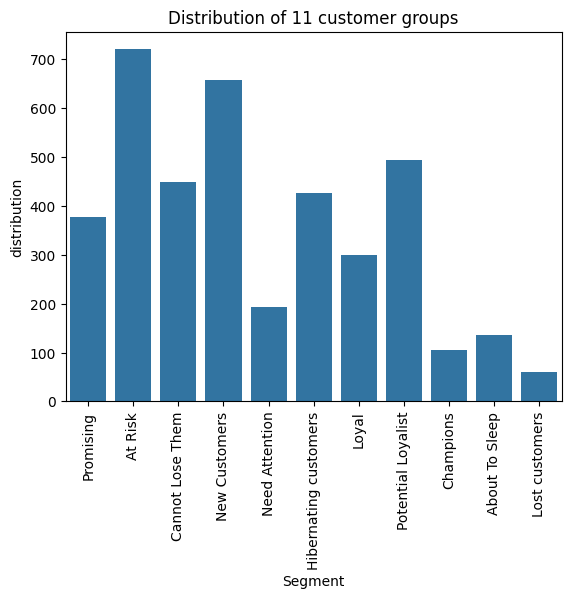

In [35]:
import seaborn as sns
sns.countplot(x='Segment', data = merged_df)
plt.xticks(rotation=90)
plt.ylabel('distribution')
plt.title('Distribution of 11 customer groups')
plt.show()

<ipython-input-36-e0e549bb3f7d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Recency'])


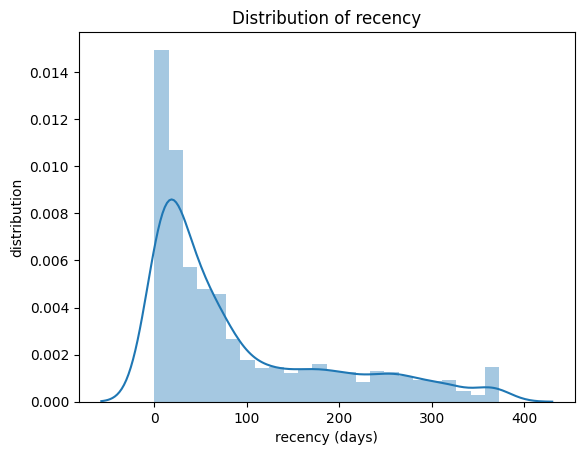

In [36]:
sns.distplot(merged_df['Recency'])
plt.xlabel('recency (days)')
plt.ylabel('distribution')
plt.title('Distribution of recency')
plt.show()

<ipython-input-38-4e9e683bf2e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Frequency'])


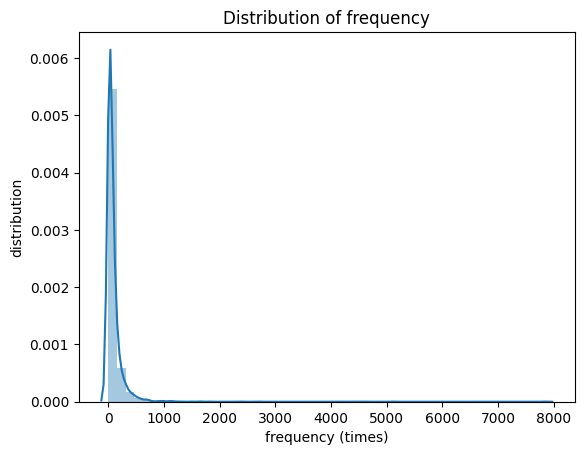

In [38]:
sns.distplot(merged_df['Frequency'])
plt.xlabel('frequency (times)')
plt.ylabel('distribution')
plt.title('Distribution of frequency')
plt.show()

<ipython-input-39-110a14899020>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['MonetaryValue'])


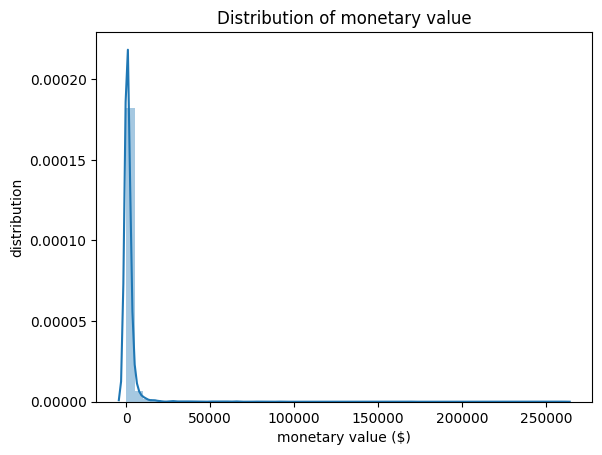

In [39]:
sns.distplot(merged_df['MonetaryValue'])
plt.xlabel('monetary value ($)')
plt.ylabel('distribution')
plt.title('Distribution of monetary value')
plt.show()